## EDA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('../data/data.csv') # read in the csv witth byte_array - label pairs
df.drop(df.columns[-20:], axis=1, inplace=True)

In [3]:
print("Number of packets: {}".format(len(df)))
df.head()

Number of packets: 89695


,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1451,byte1452,byte1453,byte1454,byte1455,byte1456,byte1457,byte1458,byte1459,byte1460
0,TeamViewer,136,10,23,50,81,180,33,162,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TeamViewer,23,50,136,10,145,225,58,15,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TeamViewer,23,50,136,10,145,225,58,15,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TeamViewer,145,58,23,50,191,255,24,32,209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TeamViewer,145,58,23,50,191,255,24,69,209,...,1.0,0.0,0.0,9.0,3.0,128.0,136.0,0.0,0.0,0.0


Number of packets per label:

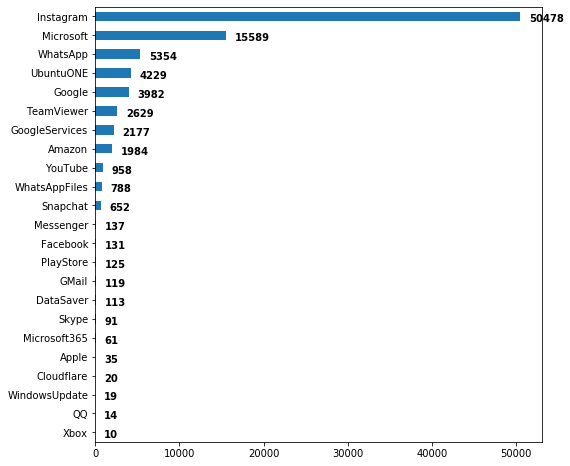

In [4]:
plt.figure(figsize=(8,8))
df_label_counts = df["label"].value_counts().sort_values(ascending=True)
ax = df_label_counts.plot.barh()
for i, v in enumerate(df_label_counts):
    ax.text(v+1000, i-0.3, str(v), fontweight='bold')

Histogram of packet lengths:

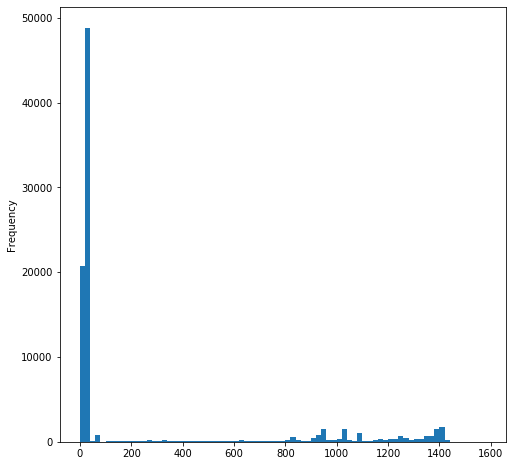

In [5]:
packet_lengths =  df.isna().sum(axis=1)
plt.figure(figsize=(8,8))
packet_lengths.plot.hist(bins = list(range(0, 1600, 20)))

## Create Train and Test datasets

In [10]:
classes = ["YouTube", "Facebook", "WhatsApp"]
num_packets = 5000

df_new = pd.DataFrame()

for label in classes:
    df_label = df[df["label"] == label] # e.g. if label == Facebook, extract the Facebook rows
    assert len(df_label) >= num_packets # e.g. make sure at least 10000 Facebook packets
    df_sampled = df_label.sample(n=num_packets, random_state=42)
    df_new = df_new.append(df_sampled)
    
df_new["label"].value_counts()

Facebook    5000
WhatsApp    5000
YouTube     5000
Name: label, dtype: int64

In [11]:
df_new.head()

,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1471,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480
371190,YouTube,1,187,241,40,165,43,117,131,190,...,60.0,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191531,YouTube,1,187,191,238,8,234,1,249,126,...,200.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465294,YouTube,1,187,243,244,96,102,45,43,86,...,158.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179828,YouTube,1,187,187,69,162,230,147,68,80,...,229.0,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349161,YouTube,1,187,240,76,46,71,252,98,195,...,197.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill NaN's with 0 i.e. zero pad

In [12]:
df_new.fillna(0, inplace=True)

In [13]:
df_new.head()

,label,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,...,byte1471,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480
371190,YouTube,1,187,241,40,165,43,117,131,190,...,60.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191531,YouTube,1,187,191,238,8,234,1,249,126,...,200.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465294,YouTube,1,187,243,244,96,102,45,43,86,...,158.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179828,YouTube,1,187,187,69,162,230,147,68,80,...,229.0,212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349161,YouTube,1,187,240,76,46,71,252,98,195,...,197.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perform the train-test split

In [14]:
df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
len(df_train), len(df_test)

(12000, 3000)

In [16]:
file_suffix = "{0}_{1}".format(len(classes),num_packets) # e.g. 3_10000

Writing to train.csv and test.csv

In [17]:
df_train.to_csv("../../data/{0}/train_{0}.csv".format(file_suffix), index=False)

In [19]:
df_test.to_csv("../../data/{0}/test_{0}.csv".format(file_suffix), index=False)